### 네이버 지식인 검색 결과에 대한 토픽 분석
- 검색어: 제주도
- 데이터: 크롤링을 이용한 데이터 수집(500개 이상 수집)
- 네이버 API를 이용한 데이터 수집
- 수집결과 저장: 질문.txt/답변.txt, 질문.csv/답변.csv  (3월29일 참조)


### 토픽 분석
- 형태소 분석(명사/형용사/부사)만 추출
- 질문에 대한 단어 빈도수 계산 및 상위 50개 차트로 출력/ 워드클라우드
- 답변에 대한 단어 빈도수 계산 및 상위 50개 차트로 출력/ 워드클라우드
- 질문/답변에 대한 워드클라우드
- TF-IDF 계산
- 단어에 대한 연관분석 및 networkx를 이용한 시각화

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from bs4 import BeautifulSoup as bs
from urllib import request
from urllib.request import quote
import urllib
import requests
import pandas as pd
import naver_kin
import re
import os
import sys
import json

In [21]:
import matplotlib.pyplot as plt
import platform

if platform.system() == "Darwin":  # 맥
    plt.rc('font', family='AppleGothic')
elif platform.system() == "Windows":  # 윈도우
    plt.rc('font', family='Malgun Gothic')
elif platform.system() == "Linux":  # 리눅스 = 코랩
    plt.rc('font', family='Malgun Gothic')

In [3]:
encText = "제주도"
for i in range(1, 1001,100):
  
    reg_link=naver_kin.get_Nav_client(encText, i)

    # link를 이용해 세부 내용 가져와 파일에 기록하기
    for link in reg_link:
        naver_kin.get_write(encText, link)

print("=== End ===")


=== End ===


In [5]:
# 저장한 파일 읽어오기 
f = open('./data/제주도_질문.txt')
txtData=f.readlines()
print(txtData[0])
f.close()

제주도 자전거



In [6]:
txtData[:10]

['제주도 자전거\n',
 '중2학년인데 내년 여름쯤에 4명이서 자전거 타러 제주도에 갈예정입니다 제주도에서 자전거 종주하면 거리는 얼마나 되고 비용은 얼마나 되는지 몰라서 물어봅니다 그리고 숙소도 어떻게 잡아야하는지 알려주시면 감사하겠습니다 최대한 싼 가격으로 부탁드려용^^\n',
 '\n',
 '제주도 전연령 렌트카\n',
 '제주도에 전연령 렌트카 좋은 곳 없을까요~~\n',
 '\n',
 '\n',
 '\n',
 '제주도여드름치료 막막하네요\n',
 '여드름 때문에 다른 지역을 가자니 교통비가 어마무시하고, 그렇다고 제주도여드름치료를 받자니 어디가 유명한지..잘 모르겠고 보이지도 않아서요. 막막하기 짝이 없는데 제주도여드름치료를 받고 완치 받은 분들이 있을 런지..아님 이쪽에 대해 잘 알고 있는 분이 있다면 답변 좀 부탁드릴게요. 하나부터 열까지 모르는 거 투성이다보니 스트레스를 안 받을래야 안 받을 수가 없네요. 요즘..\n']

In [8]:
# 데이터를 한줄단위로 가져와 명사/형용사/부사만 추출하기
from konlpy.tag import Okt

okt = Okt()
dataset = []

for i in range(len(txtData)):
    if len(re.sub('[\s]' ,"", txtData[i])) == 0:
           continue
    else:
        dataset.append(okt.pos(re.sub('[\s]' ,"", txtData[i])))

In [10]:
# 명사/부사 추출하기
Noun_Verb = []
for wl in dataset:
    for t, p in wl:
        if p == "Noun" or p == "Verb":
            Noun_Verb.append(t)
            
Noun_Verb[:10]

['제주도', '자전거', '중', '학년', '내년', '여름', '명', '자전거', '타러', '제주도']

In [16]:
# 단어 빈도수 계산
from collections import Counter

txtcnt_df = pd.DataFrame(Counter(Noun_Verb).most_common(), columns = ['단어', '빈도수'])
txtcnt_df = txt_cnt_df.sort_values(by = '빈도수', ascending = False)

<AxesSubplot:>

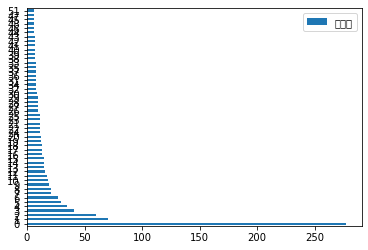

In [17]:
txtcnt_df.iloc[:50].plot(kind = "barh")

<AxesSubplot:>

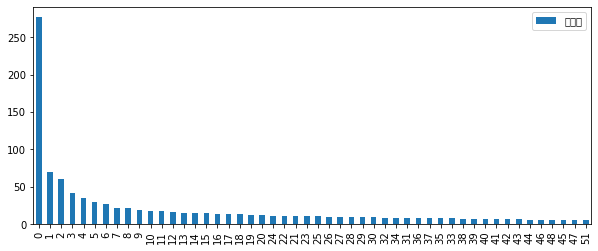

In [18]:
txtcnt_df.iloc[:50].plot(kind="bar", figsize=(10, 4))

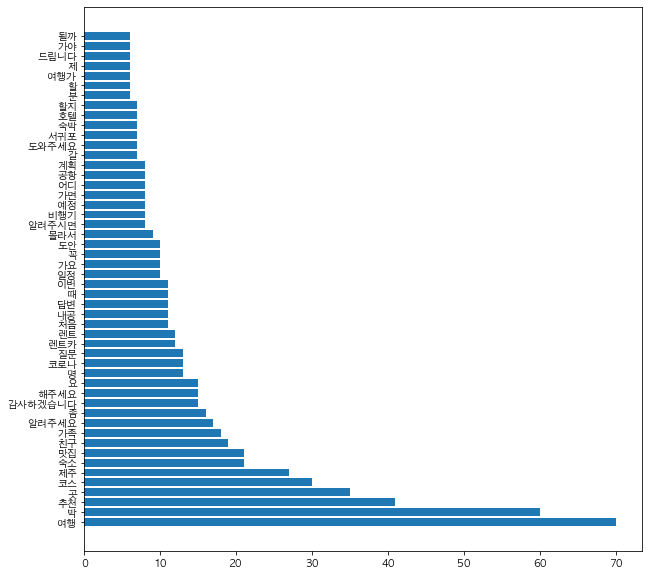

In [24]:
import matplotlib.pyplot as plt



txtcnt_df=txtcnt_df.loc[txtcnt_df['단어'] != '제주도']

plt.figure(figsize=(10, 10))
plt.barh(txtcnt_df['단어'].iloc[:50], txtcnt_df['빈도수'].iloc[:50])
plt.show()

In [33]:
# 명사/부사만 추출하기
Nonu_Verb = []
for wl in dataset:
    txt = ""
    for t, p in wl:
        if p == "Noun" or p == "Verb":
            txt += t + " "
    Nonu_Verb.append(txt)

Nonu_Verb[:5]

['제주도 자전거 ',
 '중 학년 내년 여름 명 자전거 타러 제주도 갈 예정 제주도 자전거 종 주하 거리 얼마나 되고 비용 얼마나 되는지 몰라서 물어봅니다 숙소 잡아 알려주시면 감사하겠습니다 최대한 싼 가격 ',
 '제주도 연령 렌트카 ',
 '제주도 연령 렌트카 곳 ',
 '제주도 여드름 치료 ']

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

tv=TfidfVectorizer().fit(Nonu_Verb)
print(tv.transform(Nonu_Verb).toarray())

[[0.        0.        0.        ... 0.        0.        0.       ]
 [0.        0.        0.        ... 0.        0.        0.       ]
 [0.        0.        0.        ... 0.        0.        0.       ]
 ...
 [0.        0.        0.        ... 0.        0.        0.       ]
 [0.        0.        0.        ... 0.        0.        0.       ]
 [0.        0.        0.        ... 0.        0.2987796 0.       ]]


In [37]:
features=tv.get_feature_names()
df=pd.DataFrame(tv.transform(Nonu_Verb).toarray(), columns=features)
df.head()

,가가,가게,가게되,가격,가고,가고싶어요,가고있어요,가기,가는,가는거,...,호텔,혹시,혼자,화요일,확률,환갑,후드,휴가,휴양,희망
0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.174818,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori

In [41]:
# 명사/부사만 추출하기
Nonu_Verb = []
for wl in dataset:
    lst = []
    for t, p in wl:
        if p == "Noun" or p == "Verb":
            lst.append(t)
    Nonu_Verb.append(lst)

Nonu_Verb[:2]

[['제주도', '자전거'],
 ['중',
  '학년',
  '내년',
  '여름',
  '명',
  '자전거',
  '타러',
  '제주도',
  '갈',
  '예정',
  '제주도',
  '자전거',
  '종',
  '주하',
  '거리',
  '얼마나',
  '되고',
  '비용',
  '얼마나',
  '되는지',
  '몰라서',
  '물어봅니다',
  '숙소',
  '잡아',
  '알려주시면',
  '감사하겠습니다',
  '최대한',
  '싼',
  '가격']]

In [44]:
tren=TransactionEncoder()
tren_arr = tren.fit(Nonu_Verb).transform(Nonu_Verb)
tren_df = pd.DataFrame(tren_arr, columns=tren.columns_)

aprItem = apriori(tren_df, min_support=0.1, use_colnames=True)
aprItem

,support,itemsets
0,0.175824,(곳)
1,0.285714,(박)
2,0.324176,(여행)
3,0.923077,(제주도)
4,0.181319,(추천)
5,0.131868,(코스)
6,0.153846,"(곳, 제주도)"
7,0.109890,"(여행, 박)"
8,0.252747,"(박, 제주도)"
9,0.324176,"(여행, 제주도)"


In [45]:
from mlxtend.frequent_patterns import association_rules
association_rules(aprItem, metric='lift', min_threshold=0.1)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(곳),(제주도),0.175824,0.923077,0.153846,0.875000,0.947917,-0.008453,0.615385
1,(제주도),(곳),0.923077,0.175824,0.153846,0.166667,0.947917,-0.008453,0.989011
2,(여행),(박),0.324176,0.285714,0.109890,0.338983,1.186441,0.017268,1.080586
3,(박),(여행),0.285714,0.324176,0.109890,0.384615,1.186441,0.017268,1.098214
4,(박),(제주도),0.285714,0.923077,0.252747,0.884615,0.958333,-0.010989,0.666667
5,(제주도),(박),0.923077,0.285714,0.252747,0.273810,0.958333,-0.010989,0.983607
6,(여행),(제주도),0.324176,0.923077,0.324176,1.000000,1.083333,0.024937,inf
7,(제주도),(여행),0.923077,0.324176,0.324176,0.351190,1.083333,0.024937,1.041637
8,(추천),(제주도),0.181319,0.923077,0.170330,0.939394,1.017677,0.002959,1.269231
9,(제주도),(추천),0.923077,0.181319,0.170330,0.184524,1.017677,0.002959,1.003930


In [51]:
# 네트워크 그래프
from apyori import apriori

result = (list(apriori(Nonu_Verb, min_support = 0.015)))
df_apy = pd.DataFrame(result)
df_apy.head()

,items,support,ordered_statistics
0,(가게),0.021978,"[((), (가게), 0.02197802197802198, 1.0)]"
1,(가격),0.027473,"[((), (가격), 0.027472527472527472, 1.0)]"
2,(가기),0.027473,"[((), (가기), 0.027472527472527472, 1.0)]"
3,(가도),0.016484,"[((), (가도), 0.016483516483516484, 1.0)]"
4,(가려),0.021978,"[((), (가려), 0.02197802197802198, 1.0)]"


In [53]:
df_apy['length'] = df_apy['items'].apply(lambda x : len(x))
df_apy = df_apy[(df_apy['length'] == 2) & 
                (df_apy['support'] >= 0.01)].sort_values(by = 'support', ascending = False)
df_apy.head(10)

,items,support,ordered_statistics,length
505,"(여행, 제주도)",0.324176,"[((), (여행, 제주도), 0.3241758241758242, 1.0), ((여...",2
412,"(박, 제주도)",0.252747,"[((), (박, 제주도), 0.25274725274725274, 1.0), ((박...",2
570,"(추천, 제주도)",0.170330,"[((), (추천, 제주도), 0.17032967032967034, 1.0), ((...",2
261,"(곳, 제주도)",0.153846,"[((), (곳, 제주도), 0.15384615384615385, 1.0), ((곳...",2
575,"(코스, 제주도)",0.131868,"[((), (제주도, 코스), 0.13186813186813187, 1.0), ((...",2
403,"(여행, 박)",0.109890,"[((), (여행, 박), 0.10989010989010989, 1.0), ((박)...",2
187,"(가족, 제주도)",0.093407,"[((), (가족, 제주도), 0.09340659340659341, 1.0), ((...",2
417,"(추천, 박)",0.087912,"[((), (추천, 박), 0.08791208791208792, 1.0), ((박)...",2
454,"(숙소, 제주도)",0.087912,"[((), (숙소, 제주도), 0.08791208791208792, 1.0), ((...",2
514,"(여행, 코스)",0.087912,"[((), (여행, 코스), 0.08791208791208792, 1.0), ((여...",2


In [57]:
import networkx as nx

# 그래프 정의
G1 = nx.Graph()
arn = df_apy['items']
G1.add_edges_from(arn)

In [58]:
# 노드와 엣지/페이지 랭크
pr = nx.pagerank(G1)
nsize = np.array([v for v in pr.values()])
nsiz = 2000 * (nsize- min(nsize)) / (max(nsize) - min(nsize))

AttributeError: module 'scipy.sparse' has no attribute 'coo_array'

In [59]:
# 레이아웃(다양하게 제공)
# pos = nx.planar_layout(G1)
# pos = nx.shell_layout(G1)
pos = nx.ciroular_layout(G1)


# 그래프 그리기
plt.figure(figsize = (16, 12))
plt.axis('off')
nx.draw_networkx(G1, font_family = "AppleGothic", font_size = 15, pos = pos,
                node_color = list(pr.values()), node_size = nsize,
                alpha = 0.7, edge_color = '0.5', cmap = plt.cm.YIGn)

AttributeError: module networkx has no attribute ciroular_layout